In [2]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [4]:
fake=pd.read_csv("D:/Dowload D/Fake_News_Detection-master/jupyter code/Fake.csv")
true=pd.read_csv("D:/Dowload D/Fake_News_Detection-master/jupyter code/True.csv")
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
fake.info(), true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


(None, None)


# There is no null value in the datasets

In [6]:
fake_df=fake[['text']]
true_df=true[['text']]
fake_df['label']=0
true_df['label']=1

C:\Users\Admin\AppData\Local\Temp\ipykernel_6284\1271111993.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_df['label']=0
C:\Users\Admin\AppData\Local\Temp\ipykernel_6284\1271111993.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true_df['label']=1


# All we need are just text and label (! I added the label myself )

In [7]:
data=pd.concat([fake_df,true_df], axis=0)
data=data.sample(frac=0.7)
data.tail(7)

,text,label
15956,SARAJEVO (Reuters) - A Bosnian Serb man was ar...,1
19677,This is truly a chilling story of organized vo...,0
4455,WASHINGTON/LOS ANGELES/NEW YORK (Reuters) - W...,1
123,WASHINGTON (Reuters) - A compromise Republican...,1
731,Anthony Scaramucci is a terrible communication...,0
14130,JOHANNESBURG (Reuters) - South Africa s Deputy...,1
8431,"At some point, Republicans learned that they c...",0


# Adding and randomizing process of two datasets

In [8]:
df=data.reset_index()
df.drop(['index'], axis=1, inplace=True)
df.head()

,text,label
0,CAIRO (Reuters) - Islamic State threatened att...,1
1,"WASHINGTON (Reuters) - The U.S. Congress, rush...",1
2,LONDON (Reuters) - British negotiators are sti...,1
3,The following statements were posted to the ve...,1
4,What a great time for Joe Biden to announce. H...,0


In [9]:
X=df['text']
y=df['label']

In [10]:
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=7)

In [11]:
tfid_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
train_tfid=tfid_vectorizer.fit_transform(x_train)
test_tfid=tfid_vectorizer.transform(x_test)

In [12]:
PA_classifier=PassiveAggressiveClassifier(max_iter=50)
PA_classifier.fit(train_tfid, y_train)

PassiveAggressiveClassifier(max_iter=50)

Classification Report:               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3290
           1       0.99      0.99      0.99      2996

    accuracy                           0.99      6286
   macro avg       0.99      0.99      0.99      6286
weighted avg       0.99      0.99      0.99      6286

Accuracy Score: 0.9925230671333122


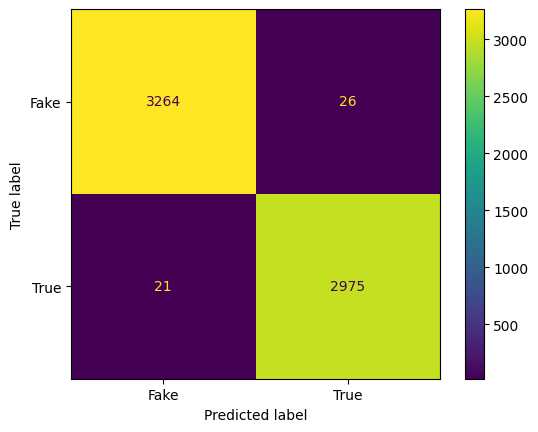

In [13]:
pa_predict=PA_classifier.predict(test_tfid)
print("Classification Report:", classification_report(y_test, pa_predict))
print("Accuracy Score:", accuracy_score(y_test, pa_predict))

con_pa=confusion_matrix(y_test, pa_predict)
con_mat=ConfusionMatrixDisplay(con_pa, display_labels=['Fake','True'])
con_mat.plot()
plt.show()

Wow! look at this, 99.25 % accuracy

In [14]:
linear_cl=LogisticRegression()
linear_cl.fit(train_tfid,y_train)

LogisticRegression()

Classification Report:               precision    recall  f1-score   support

           0       0.98      0.98      0.98      3290
           1       0.98      0.98      0.98      2996

    accuracy                           0.98      6286
   macro avg       0.98      0.98      0.98      6286
weighted avg       0.98      0.98      0.98      6286

Accuracy Score: 0.9804327076041998


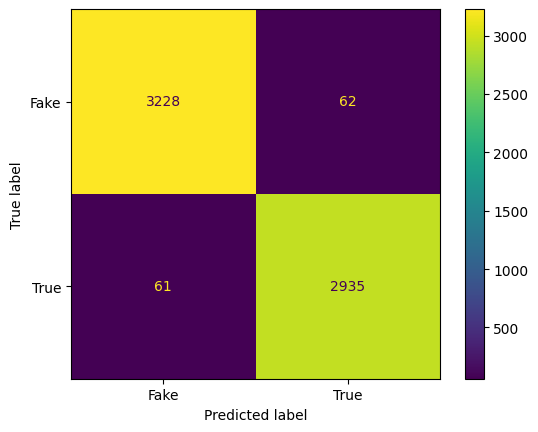

In [15]:
linear_predict=linear_cl.predict(test_tfid)
print("Classification Report:", classification_report(y_test, linear_predict))
print("Accuracy Score:", accuracy_score(y_test, linear_predict))

con_pa=confusion_matrix(y_test, linear_predict)
con_mat=ConfusionMatrixDisplay(con_pa, display_labels=['Fake','True'])
con_mat.plot()
plt.show()

Logistic Regression is working with 98.27 % accuracy

In [16]:
tree_model=DecisionTreeClassifier()
tree_model.fit(train_tfid, y_train)

DecisionTreeClassifier()

Classification Report:               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3290
           1       0.99      0.99      0.99      2996

    accuracy                           0.99      6286
   macro avg       0.99      0.99      0.99      6286
weighted avg       0.99      0.99      0.99      6286

Accuracy Score: 0.9944320712694877


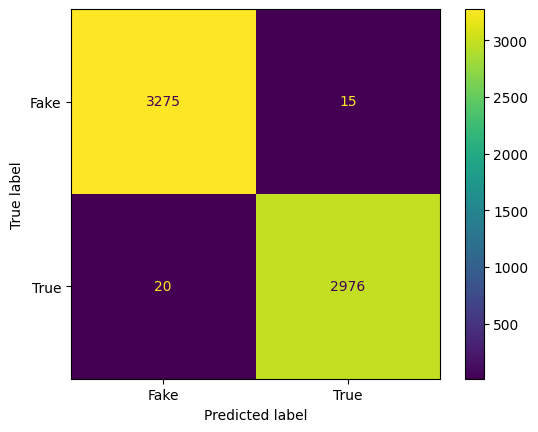

In [17]:
tree_predict=tree_model.predict(test_tfid)
print("Classification Report:", classification_report(y_test, tree_predict))
print("Accuracy Score:", accuracy_score(y_test, tree_predict))

con_pa=confusion_matrix(y_test, tree_predict)
con_mat=ConfusionMatrixDisplay(con_pa, display_labels=['Fake','True'])
con_mat.plot()
plt.show()

Decision Tree model is working with 99.36 % accuracy

In [18]:
xgboost_model=XGBClassifier()
xgboost_model.fit(train_tfid,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3290
           1       1.00      1.00      1.00      2996

    accuracy                           1.00      6286
   macro avg       1.00      1.00      1.00      6286
weighted avg       1.00      1.00      1.00      6286

Accuracy Score: 0.9968183264397072


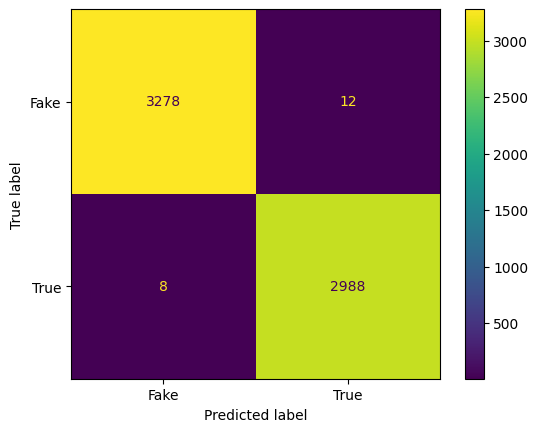

In [19]:
xgb_predict=xgboost_model.predict(test_tfid)
print("Classification Report:", classification_report(y_test, xgb_predict))
print("Accuracy Score:", accuracy_score(y_test, xgb_predict))

con_pa=confusion_matrix(y_test, xgb_predict)
con_mat=ConfusionMatrixDisplay(con_pa, display_labels=['Fake','True'])
con_mat.plot()
plt.show()

In [21]:
import pickle
pickle.dump(xgboost_model,open("modell.pkl","wb"))